<a href="https://colab.research.google.com/github/aliakbarbadri/persian-poetry-creator/blob/master/word-lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

# Data

In [0]:
url = "https://raw.githubusercontent.com/aliakbarbadri/persian-poetry-creator/master/shahname2.txt"
filepath = keras.utils.get_file("shahname.txt", url) 
with open(filepath) as f:
  data = f.read()
texts = data.split("\n")

In [11]:
beyt10 = "\n".join(texts[:20])
len(beyt10.split())

204

In [0]:
corpus = []
length = 20
for i in range(int(20000/length)):
  beyt10 = "\n".join(texts[i:i+length])
  corpus.append(beyt10)

In [13]:
len(corpus)

1000

In [14]:
corpus[0]

'چو ترکان بدیدند کارجاسپ رفت\tهمی آید از هر سوی تیغ تفت\nهمه سرکشانشان پیاده شدند\tبه پیش گو اسفندیار آمدند\nکمانچای چاچی بینداختند\tقبای نبردی برون آختند\nبه زاریش گفتند گر شهریار\tدهد بندگان را به جان زینهار\nبدین اندر آییم و خواهش کنیم\tهمه آذران را نیایش کنیم\nازیشان چو بشنید اسفندیار\tبه جان و به تن دادشان زینهار\nبران لشگر گشن آواز داد\tگو نامبردار فرخ\u200cنژاد\nکه این نامداران ایرانیان\tبگردید زین لشکر چینیان\nکنون کاین سپاه عدو گشت پست\tازین سهم و کشتن بدارید دست\nکه بس زاروارند و بیچاره\u200cوار\tدهدی این سگان را به جان زینهار\nبدارید دست از گرفتن کنون\tمبندید کس را مریزید خون\nمتازید و این کشتگان مسپرید\tبگردید و این خستگان بشمرید\nمگیریدشان بهر جان زریر\tبر اسپان جنگی مپایید دیر\nچو لشکر شنیدند آواز اوی\tشدند از بر خستگان بارزوی\nبه لشکرگه خود فرود آمدند\tبه پیروز گشتن تبیره زدند\nهمه شب نخفتند زان خرمی\tکه پیروزی بودشان رستمی\nچو اندر شکست آن شب تیره\u200cگون\tبه دشت و بیابان فرو خورد خون\nکی نامور با سران سپاه\tبیامد به دیدار آن رزمگاه\nهمی گرد آن کشتگان بر بگشت\tکرا دید 

In [15]:
print(corpus[0])

چو ترکان بدیدند کارجاسپ رفت	همی آید از هر سوی تیغ تفت
همه سرکشانشان پیاده شدند	به پیش گو اسفندیار آمدند
کمانچای چاچی بینداختند	قبای نبردی برون آختند
به زاریش گفتند گر شهریار	دهد بندگان را به جان زینهار
بدین اندر آییم و خواهش کنیم	همه آذران را نیایش کنیم
ازیشان چو بشنید اسفندیار	به جان و به تن دادشان زینهار
بران لشگر گشن آواز داد	گو نامبردار فرخ‌نژاد
که این نامداران ایرانیان	بگردید زین لشکر چینیان
کنون کاین سپاه عدو گشت پست	ازین سهم و کشتن بدارید دست
که بس زاروارند و بیچاره‌وار	دهدی این سگان را به جان زینهار
بدارید دست از گرفتن کنون	مبندید کس را مریزید خون
متازید و این کشتگان مسپرید	بگردید و این خستگان بشمرید
مگیریدشان بهر جان زریر	بر اسپان جنگی مپایید دیر
چو لشکر شنیدند آواز اوی	شدند از بر خستگان بارزوی
به لشکرگه خود فرود آمدند	به پیروز گشتن تبیره زدند
همه شب نخفتند زان خرمی	که پیروزی بودشان رستمی
چو اندر شکست آن شب تیره‌گون	به دشت و بیابان فرو خورد خون
کی نامور با سران سپاه	بیامد به دیدار آن رزمگاه
همی گرد آن کشتگان بر بگشت	کرا دید بگریست و اندر گذشت
برادرش را دید کشته به زار	به آوردگ

In [0]:
tokenizer = Tokenizer(filters="")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [0]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

# Model

In [18]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 215, 100)          433600    
_________________________________________________________________
bidirectional (Bidirectional (None, 215, 300)          301200    
_________________________________________________________________
dropout (Dropout)            (None, 215, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 2168)              218968    
_________________________________________________________________
dense_1 (Dense)              (None, 4336)              9404784   
Total params: 10,518,952
Trainable params: 10,518,952
Non-trainable params: 0
____________________________________________

In [19]:
history = model.fit(predictors, label, epochs=10)

Epoch 1/15
5702/5702 [==============================] - 223s 39ms/step - loss: 6.6349 - accuracy: 0.0472
Epoch 2/15
5702/5702 [==============================] - 225s 39ms/step - loss: 5.2143 - accuracy: 0.1074
Epoch 3/15
5702/5702 [==============================] - 224s 39ms/step - loss: 3.6850 - accuracy: 0.2892
Epoch 4/15
5702/5702 [==============================] - 224s 39ms/step - loss: 2.4668 - accuracy: 0.5499
Epoch 5/15
5702/5702 [==============================] - 224s 39ms/step - loss: 1.6996 - accuracy: 0.7402
Epoch 6/15
5702/5702 [==============================] - 224s 39ms/step - loss: 1.2084 - accuracy: 0.8543
Epoch 7/15
5702/5702 [==============================] - 224s 39ms/step - loss: 0.9102 - accuracy: 0.9098
Epoch 8/15
5702/5702 [==============================] - 225s 39ms/step - loss: 0.7246 - accuracy: 0.9371
Epoch 9/15
5702/5702 [==============================] - 226s 40ms/step - loss: 0.6039 - accuracy: 0.9515
Epoch 10/15
5702/5702 [==============================] 

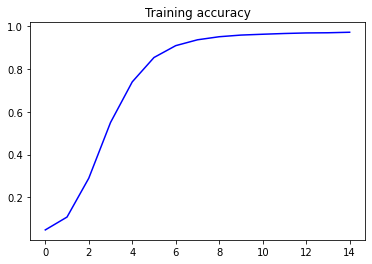

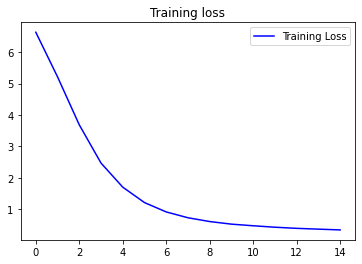

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [21]:
seed_text = "که ایران چو باغی ست خرم بهار"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
که ایران چو باغی ست خرم بهار کش سلیح شست
ببایست با هم یکسره	همی روی ایزد آفرید
بفرمود تا هرک بخرد بدند	بران لشکر روم موبد بدند
نشستند و او را به آیین بخواست	به رسم مسیحا و پیوند راست
برو ریخت دینار چندان ز گنج	که شد ماه را راه رفتن به راه	فرود آید او همچنان با سپاه
ببیندش و برگردد از پیش اوی	پراندیشه بد زان سخن نامجوی
پس آنگاه خاقان چنان هم بر اسب	ابا موبد خویش پیداگشسب
فرود آمد از اسب خاقان همان	بیامد برشاه ایران دمان
درنگی ببد تا جهاندار شاه	نشست از بر تازی اسبی سیاه
شهنشاه اسب تگاور براند	بدهلیز با او زمانی بماند
چوخاقان برفت از در شهریار	عنانش گرفت آن زمان پرده دار
پیاده شد از باره پرموده


In [0]:
model.save("word_lstm.h5")